In [13]:
import os
import time
import uuid
import cv2

In [17]:


import shutil

src = '/kaggle/input/facecustomeimagedataset'
dst = '/kaggle/working/facecustomeimagedataset'

# Allow overwrite if the destination already exists
shutil.copytree(src, dst, dirs_exist_ok=True)

print("Dataset copied to working directory!")



Dataset copied to working directory!


In [18]:
#Importing dependencies
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [19]:
#Storing the image directory of the available dataset
images = tf.data.Dataset.list_files('/kaggle/working/facecustomeimagedataset/Data/Images')

In [20]:
#This will give the images path that we have stored
images.as_numpy_iterator().next()

b'/kaggle/working/facecustomeimagedataset/Data/Images'

In [21]:
#This is loading the image loading function
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [22]:

images = images.map(load_image)

In [23]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

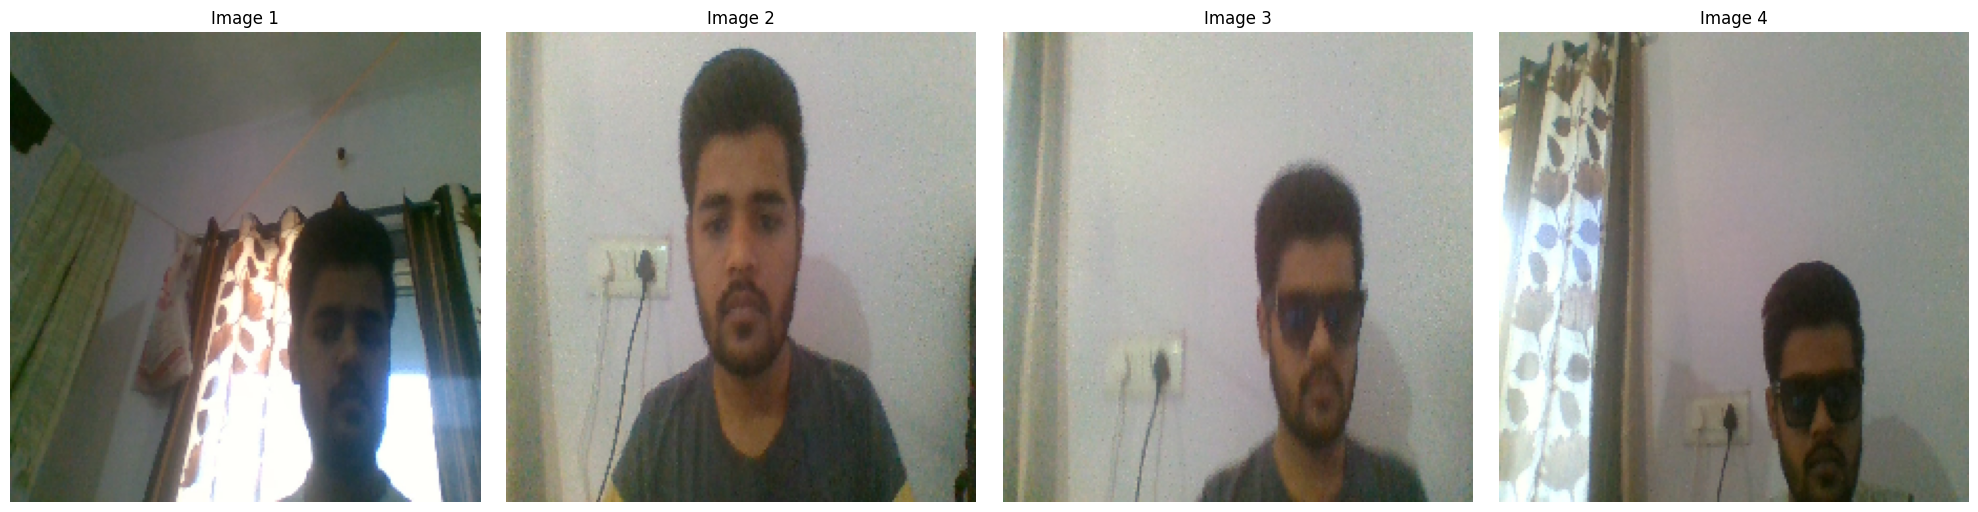

In [24]:
#Plotting the image data available 
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

# Path to images
image_dir = pathlib.Path("/kaggle/working/facecustomeimagedataset/Data/Images")

# Get all image paths
image_paths = list(image_dir.glob("*.jpg"))[:4]  # load only first 4 for visualization

# Load and preprocess images
images = []
for path in image_paths:
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    images.append(img_array)

# Plot the images
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
for idx, image in enumerate(images):
    ax[idx].imshow(image.astype("uint8"))
    ax[idx].axis('off')
    ax[idx].set_title(f"Image {idx+1}")

plt.tight_layout()
plt.show()


In [25]:
#Here we are creating a labels directory to store the json formated labels
import os
# Path to the target directory
target_directory = '/kaggle/working/facecustomeimagedataset/Data'

# Create the directory if it does not exist
os.makedirs(target_directory, exist_ok=True)

print(f"Directory 'labels' created at {target_directory}")


Directory 'labels' created at /kaggle/working/facecustomeimagedataset/Data


In [27]:
!ls /kaggle/working/facecustomeimagedataset/Data/Images
#Here we are listing the images in Images drectory

 WIN_20240801_11_23_00_Pro.jpg	      WIN_20250413_10_56_56_Pro.jpg
 WIN_20250318_17_10_05_Pro.jpg	     'WIN_20250413_10_56_57_Pro (2).jpg'
 WIN_20250318_17_10_19_Pro.jpg	      WIN_20250413_10_56_57_Pro.jpg
 WIN_20250403_14_55_45_Pro.jpg	     'WIN_20250413_10_56_58_Pro (2).jpg'
 WIN_20250404_17_19_37_Pro.jpg	      WIN_20250413_10_56_58_Pro.jpg
 WIN_20250413_10_36_39_Pro.jpg	     'WIN_20250413_10_56_59_Pro (2).jpg'
 WIN_20250413_10_36_42_Pro.jpg	     'WIN_20250413_10_56_59_Pro (3).jpg'
 WIN_20250413_10_36_46_Pro.jpg	      WIN_20250413_10_56_59_Pro.jpg
 WIN_20250413_10_36_50_Pro.jpg	     'WIN_20250413_10_57_00_Pro (2).jpg'
 WIN_20250413_10_36_53_Pro.jpg	      WIN_20250413_10_57_00_Pro.jpg
 WIN_20250413_10_36_58_Pro.jpg	      WIN_20250413_10_57_01_Pro.jpg
 WIN_20250413_10_37_02_Pro.jpg	     'WIN_20250413_10_57_02_Pro (2).jpg'
 WIN_20250413_10_37_05_Pro.jpg	      WIN_20250413_10_57_02_Pro.jpg
 WIN_20250413_10_37_07_Pro.jpg	     'WIN_20250413_10_57_03_Pro (2).jpg'
 WIN_20250413_10_37_10_Pro.

In [28]:
!ls /kaggle/working/facecustomeimagedataset/Data/Labels
#Here we are printing the files in Labels directory

 WIN_20240801_11_23_00_Pro.xml	      WIN_20250413_10_56_56_Pro.xml
 WIN_20250318_17_10_05_Pro.xml	     'WIN_20250413_10_56_57_Pro (2).xml'
 WIN_20250318_17_10_19_Pro.xml	      WIN_20250413_10_56_57_Pro.xml
 WIN_20250403_14_55_45_Pro.xml	     'WIN_20250413_10_56_58_Pro (2).xml'
 WIN_20250404_17_19_37_Pro.xml	      WIN_20250413_10_56_58_Pro.xml
 WIN_20250413_10_36_39_Pro.xml	     'WIN_20250413_10_56_59_Pro (2).xml'
 WIN_20250413_10_36_42_Pro.xml	     'WIN_20250413_10_56_59_Pro (3).xml'
 WIN_20250413_10_36_46_Pro.xml	      WIN_20250413_10_56_59_Pro.xml
 WIN_20250413_10_36_50_Pro.xml	     'WIN_20250413_10_57_00_Pro (2).xml'
 WIN_20250413_10_36_53_Pro.xml	      WIN_20250413_10_57_00_Pro.xml
 WIN_20250413_10_36_58_Pro.xml	      WIN_20250413_10_57_01_Pro.xml
 WIN_20250413_10_37_02_Pro.xml	     'WIN_20250413_10_57_02_Pro (2).xml'
 WIN_20250413_10_37_05_Pro.xml	      WIN_20250413_10_57_02_Pro.xml
 WIN_20250413_10_37_07_Pro.xml	     'WIN_20250413_10_57_03_Pro (2).xml'
 WIN_20250413_10_37_10_Pro.

In [29]:
!ls /kaggle/working/facecustomeimagedataset/Data/labels
#Here we are checking is there any fie availabel in labels directory
#In this directory only we will be storing the json formated labels

In [30]:
#We have xml formated labels of images.We need json formated labels.
#This code converts the xml formated labels to json formated labels and store in the 
#directory : /kaggle/working/facecustomeimagedataset/Data/labels
import os
import json
import xml.etree.ElementTree as ET

# Input and output paths
xml_dir = '/kaggle/working/facecustomeimagedataset/Data/Labels'
json_dir = '/kaggle/working/facecustomeimagedataset/Data/labels'

# Create output directory if it doesn't exist
os.makedirs(json_dir, exist_ok=True)

# Iterate over all XML files
for xml_file in os.listdir(xml_dir):
    if not xml_file.endswith('.xml'):
        continue

    xml_path = os.path.join(xml_dir, xml_file)

    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()

    json_data = {
        "version": "4.5.6",
        "flags": {},
        "shapes": [],
        "imagePath": "",
        "imageData": None,
        "imageHeight": None,
        "imageWidth": None
    }

    # Extract image filename and size
    filename = root.find('filename').text
    size = root.find('size')
    if size is not None:
        json_data["imageHeight"] = int(size.find('height').text)
        json_data["imageWidth"] = int(size.find('width').text)
    json_data["imagePath"] = filename

    # Loop through objects
    for obj in root.findall('object'):
        label = obj.find('name').text
        bndbox = obj.find('bndbox')

        xmin = int(float(bndbox.find('xmin').text))
        ymin = int(float(bndbox.find('ymin').text))
        xmax = int(float(bndbox.find('xmax').text))
        ymax = int(float(bndbox.find('ymax').text))

        shape = {
            "label": label,
            "points": [[xmin, ymin], [xmax, ymax]],
            "group_id": None,
            "shape_type": "rectangle",
            "flags": {}
        }

        json_data["shapes"].append(shape)

    # Save the JSON file
    json_filename = os.path.splitext(xml_file)[0] + '.json'
    json_path = os.path.join(json_dir, json_filename)

    with open(json_path, 'w') as f:
        json.dump(json_data, f, indent=4)

print("✅ All XML files have been successfully converted to Labelme-compatible JSON format.")


✅ All XML files have been successfully converted to Labelme-compatible JSON format.


In [31]:
!ls /kaggle/working/facecustomeimagedataset/Data/labels
#Checking whether json formated labels is stored in the above directory or not.

 WIN_20240801_11_23_00_Pro.json        WIN_20250413_10_56_56_Pro.json
 WIN_20250318_17_10_05_Pro.json       'WIN_20250413_10_56_57_Pro (2).json'
 WIN_20250318_17_10_19_Pro.json        WIN_20250413_10_56_57_Pro.json
 WIN_20250403_14_55_45_Pro.json       'WIN_20250413_10_56_58_Pro (2).json'
 WIN_20250404_17_19_37_Pro.json        WIN_20250413_10_56_58_Pro.json
 WIN_20250413_10_36_39_Pro.json       'WIN_20250413_10_56_59_Pro (2).json'
 WIN_20250413_10_36_42_Pro.json       'WIN_20250413_10_56_59_Pro (3).json'
 WIN_20250413_10_36_46_Pro.json        WIN_20250413_10_56_59_Pro.json
 WIN_20250413_10_36_50_Pro.json       'WIN_20250413_10_57_00_Pro (2).json'
 WIN_20250413_10_36_53_Pro.json        WIN_20250413_10_57_00_Pro.json
 WIN_20250413_10_36_58_Pro.json        WIN_20250413_10_57_01_Pro.json
 WIN_20250413_10_37_02_Pro.json       'WIN_20250413_10_57_02_Pro (2).json'
 WIN_20250413_10_37_05_Pro.json        WIN_20250413_10_57_02_Pro.json
 WIN_20250413_10_37_07_Pro.json       'WIN_20250413_10_57_03

Data partitinon and Augmentation

In [33]:
#Creating three new folders with name train , test  and val.
import os
base_path = '/kaggle/working/facecustomeimagedataset/Data'
folders = ['train', 'test', 'val']
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    print(f"Created: {folder_path}")


Created: /kaggle/working/facecustomeimagedataset/Data/train
Created: /kaggle/working/facecustomeimagedataset/Data/test
Created: /kaggle/working/facecustomeimagedataset/Data/val


In [35]:
#Now we will create the images and labels folders inside the train , test and val folders
base_path = '/kaggle/working/facecustomeimagedataset/Data/train'
folders = ['images', 'labels']
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    print(f"Created: {folder_path}")


base_path = '/kaggle/working/facecustomeimagedataset/Data/test'
folders = ['images', 'labels']
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    print(f"Created: {folder_path}")


base_path = '/kaggle/working/facecustomeimagedataset/Data/val'
folders = ['images', 'labels']
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    print(f"Created: {folder_path}")

Created: /kaggle/working/facecustomeimagedataset/Data/train/images
Created: /kaggle/working/facecustomeimagedataset/Data/train/labels
Created: /kaggle/working/facecustomeimagedataset/Data/test/images
Created: /kaggle/working/facecustomeimagedataset/Data/test/labels
Created: /kaggle/working/facecustomeimagedataset/Data/val/images
Created: /kaggle/working/facecustomeimagedataset/Data/val/labels


In [36]:
import os
import random
import shutil

# Paths
source_dir = '/kaggle/working/facecustomeimagedataset/Data/Images'
train_dir = '/kaggle/working/facecustomeimagedataset/Data/train/images'
test_dir = '/kaggle/working/facecustomeimagedataset/Data/test/images'
val_dir = '/kaggle/working/facecustomeimagedataset/Data/val/images'

# Create destination folders if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get all image filenames
all_images = [img for img in os.listdir(source_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Shuffle the list randomly
random.shuffle(all_images)

# Calculate split sizes
total = len(all_images)
train_split = int(0.7 * total)
test_split = int(0.15 * total)
val_split = total - train_split - test_split  # To ensure total is preserved

# Split the data
train_images = all_images[:train_split]
test_images = all_images[train_split:train_split + test_split]
val_images = all_images[train_split + test_split:]

# Function to copy files
def copy_files(image_list, target_folder):
    for image in image_list:
        shutil.copy(os.path.join(source_dir, image), os.path.join(target_folder, image))

# Copy the files
copy_files(train_images, train_dir)
copy_files(test_images, test_dir)
copy_files(val_images, val_dir)

print(f"Copied {len(train_images)} images to train")
print(f"Copied {len(test_images)} images to test")
print(f"Copied {len(val_images)} images to val")


Copied 268 images to train
Copied 57 images to test
Copied 59 images to val


In [37]:
!ls /kaggle/working/facecustomeimagedataset/Data/val/images
#THis ensures images are sucessfully copied to the val directory

 WIN_20240801_11_23_00_Pro.jpg	     'WIN_20250413_10_57_05_Pro (2).jpg'
 WIN_20250413_10_36_53_Pro.jpg	      WIN_20250413_10_57_05_Pro.jpg
 WIN_20250413_10_37_07_Pro.jpg	      WIN_20250413_10_57_06_Pro.jpg
 WIN_20250413_10_37_14_Pro.jpg	     'WIN_20250413_10_57_07_Pro (2).jpg'
 WIN_20250413_10_37_39_Pro.jpg	     'WIN_20250413_10_57_45_Pro (2).jpg'
 WIN_20250413_10_37_47_Pro.jpg	     'WIN_20250413_10_57_46_Pro (2).jpg'
 WIN_20250413_10_37_54_Pro.jpg	     'WIN_20250413_10_57_52_Pro (2).jpg'
 WIN_20250413_10_38_09_Pro.jpg	     'WIN_20250413_10_58_00_Pro (2).jpg'
 WIN_20250413_10_54_17_Pro.jpg	      WIN_20250413_10_58_00_Pro.jpg
 WIN_20250413_10_54_38_Pro.jpg	      WIN_20250413_10_58_01_Pro.jpg
 WIN_20250413_10_55_32_Pro.jpg	      WIN_20250413_10_58_05_Pro.jpg
 WIN_20250413_10_55_33_Pro.jpg	     'WIN_20250413_10_58_08_Pro (2).jpg'
 WIN_20250413_10_55_46_Pro.jpg	      WIN_20250413_10_58_13_Pro.jpg
 WIN_20250413_10_55_55_Pro.jpg	     'WIN_20250413_10_58_18_Pro (2).jpg'
'WIN_20250413_10_55_58

In [38]:
!ls /kaggle/working/facecustomeimagedataset/Data/train/images
#This ensures images are copied to train directory successfully

 WIN_20250318_17_10_05_Pro.jpg	     'WIN_20250413_10_56_56_Pro (2).jpg'
 WIN_20250318_17_10_19_Pro.jpg	     'WIN_20250413_10_56_56_Pro (3).jpg'
 WIN_20250404_17_19_37_Pro.jpg	      WIN_20250413_10_56_57_Pro.jpg
 WIN_20250413_10_36_39_Pro.jpg	     'WIN_20250413_10_56_58_Pro (2).jpg'
 WIN_20250413_10_36_46_Pro.jpg	      WIN_20250413_10_56_58_Pro.jpg
 WIN_20250413_10_36_50_Pro.jpg	     'WIN_20250413_10_56_59_Pro (2).jpg'
 WIN_20250413_10_37_02_Pro.jpg	     'WIN_20250413_10_56_59_Pro (3).jpg'
 WIN_20250413_10_37_05_Pro.jpg	      WIN_20250413_10_56_59_Pro.jpg
 WIN_20250413_10_37_10_Pro.jpg	      WIN_20250413_10_57_00_Pro.jpg
 WIN_20250413_10_37_17_Pro.jpg	     'WIN_20250413_10_57_02_Pro (2).jpg'
 WIN_20250413_10_37_28_Pro.jpg	      WIN_20250413_10_57_02_Pro.jpg
 WIN_20250413_10_37_31_Pro.jpg	      WIN_20250413_10_57_03_Pro.jpg
 WIN_20250413_10_37_42_Pro.jpg	     'WIN_20250413_10_57_04_Pro (2).jpg'
 WIN_20250413_10_37_43_Pro.jpg	      WIN_20250413_10_57_04_Pro.jpg
 WIN_20250413_10_37_49_Pro.

In [39]:
!ls /kaggle/working/facecustomeimagedataset/Data/test/images
#This ensures that images are copied to the test directory

 WIN_20250403_14_55_45_Pro.jpg	     'WIN_20250413_10_57_00_Pro (2).jpg'
 WIN_20250413_10_36_42_Pro.jpg	      WIN_20250413_10_57_01_Pro.jpg
 WIN_20250413_10_36_58_Pro.jpg	      WIN_20250413_10_57_08_Pro.jpg
 WIN_20250413_10_37_20_Pro.jpg	      WIN_20250413_10_57_45_Pro.jpg
 WIN_20250413_10_37_26_Pro.jpg	     'WIN_20250413_10_57_47_Pro (2).jpg'
 WIN_20250413_10_37_45_Pro.jpg	      WIN_20250413_10_57_48_Pro.jpg
 WIN_20250413_10_38_25_Pro.jpg	      WIN_20250413_10_57_53_Pro.jpg
 WIN_20250413_10_38_34_Pro.jpg	      WIN_20250413_10_57_56_Pro.jpg
 WIN_20250413_10_54_30_Pro.jpg	     'WIN_20250413_10_57_59_Pro (2).jpg'
 WIN_20250413_10_55_13_Pro.jpg	     'WIN_20250413_10_58_12_Pro (2).jpg'
 WIN_20250413_10_55_25_Pro.jpg	      WIN_20250413_10_58_14_Pro.jpg
 WIN_20250413_10_55_58_Pro.jpg	     'WIN_20250413_10_58_20_Pro (2).jpg'
 WIN_20250413_10_56_11_Pro.jpg	     'WIN_20250413_10_58_24_Pro (2).jpg'
'WIN_20250413_10_56_13_Pro (2).jpg'  'WIN_20250413_10_58_29_Pro (2).jpg'
'WIN_20250413_10_56_19_Pro

In [43]:
#We have copied the images in train , test and val data.
#Now we will have to copy the labels of corresponding images in corresponding 
#labels folder in train test and val folder.
import os
import shutil

base_path = '/kaggle/working/facecustomeimagedataset/Data'

for folder in ['train', 'test', 'val']:
    image_folder = os.path.join(base_path, folder, 'images')
    label_folder = os.path.join(base_path, folder, 'labels')
    original_label_folder = os.path.join(base_path, 'labels')

    for file in os.listdir(image_folder):
        filename = os.path.splitext(file)[0] + '.json'
        existing_filepath = os.path.join(original_label_folder, filename)

        if os.path.exists(existing_filepath):
            new_filepath = os.path.join(label_folder, filename)
            shutil.move(existing_filepath, new_filepath)



In [44]:
!ls /kaggle/working/facecustomeimagedataset/Data/val/labels
#This makes sure that labels are stored successfully for val images 

 WIN_20240801_11_23_00_Pro.json       'WIN_20250413_10_57_05_Pro (2).json'
 WIN_20250413_10_36_53_Pro.json        WIN_20250413_10_57_05_Pro.json
 WIN_20250413_10_37_07_Pro.json        WIN_20250413_10_57_06_Pro.json
 WIN_20250413_10_37_14_Pro.json       'WIN_20250413_10_57_07_Pro (2).json'
 WIN_20250413_10_37_39_Pro.json       'WIN_20250413_10_57_45_Pro (2).json'
 WIN_20250413_10_37_47_Pro.json       'WIN_20250413_10_57_46_Pro (2).json'
 WIN_20250413_10_37_54_Pro.json       'WIN_20250413_10_57_52_Pro (2).json'
 WIN_20250413_10_38_09_Pro.json       'WIN_20250413_10_58_00_Pro (2).json'
 WIN_20250413_10_54_17_Pro.json        WIN_20250413_10_58_00_Pro.json
 WIN_20250413_10_54_38_Pro.json        WIN_20250413_10_58_01_Pro.json
 WIN_20250413_10_55_32_Pro.json        WIN_20250413_10_58_05_Pro.json
 WIN_20250413_10_55_33_Pro.json       'WIN_20250413_10_58_08_Pro (2).json'
 WIN_20250413_10_55_46_Pro.json        WIN_20250413_10_58_13_Pro.json
 WIN_20250413_10_55_55_Pro.json       'WIN_20250413_10_

In [45]:
!ls /kaggle/working/facecustomeimagedataset/Data/train/labels
#This makes sure that labels are stored successfully for train images 

 WIN_20250318_17_10_05_Pro.json       'WIN_20250413_10_56_56_Pro (2).json'
 WIN_20250318_17_10_19_Pro.json       'WIN_20250413_10_56_56_Pro (3).json'
 WIN_20250404_17_19_37_Pro.json        WIN_20250413_10_56_57_Pro.json
 WIN_20250413_10_36_39_Pro.json       'WIN_20250413_10_56_58_Pro (2).json'
 WIN_20250413_10_36_46_Pro.json        WIN_20250413_10_56_58_Pro.json
 WIN_20250413_10_36_50_Pro.json       'WIN_20250413_10_56_59_Pro (2).json'
 WIN_20250413_10_37_02_Pro.json       'WIN_20250413_10_56_59_Pro (3).json'
 WIN_20250413_10_37_05_Pro.json        WIN_20250413_10_56_59_Pro.json
 WIN_20250413_10_37_10_Pro.json        WIN_20250413_10_57_00_Pro.json
 WIN_20250413_10_37_17_Pro.json       'WIN_20250413_10_57_02_Pro (2).json'
 WIN_20250413_10_37_28_Pro.json        WIN_20250413_10_57_02_Pro.json
 WIN_20250413_10_37_31_Pro.json        WIN_20250413_10_57_03_Pro.json
 WIN_20250413_10_37_42_Pro.json       'WIN_20250413_10_57_04_Pro (2).json'
 WIN_20250413_10_37_43_Pro.json        WIN_20250413_10_

In [46]:
!ls /kaggle/working/facecustomeimagedataset/Data/test/labels
#This makes sure that labels are stored successfully for test images 

 WIN_20250403_14_55_45_Pro.json       'WIN_20250413_10_57_00_Pro (2).json'
 WIN_20250413_10_36_42_Pro.json        WIN_20250413_10_57_01_Pro.json
 WIN_20250413_10_36_58_Pro.json        WIN_20250413_10_57_08_Pro.json
 WIN_20250413_10_37_20_Pro.json        WIN_20250413_10_57_45_Pro.json
 WIN_20250413_10_37_26_Pro.json       'WIN_20250413_10_57_47_Pro (2).json'
 WIN_20250413_10_37_45_Pro.json        WIN_20250413_10_57_48_Pro.json
 WIN_20250413_10_38_25_Pro.json        WIN_20250413_10_57_53_Pro.json
 WIN_20250413_10_38_34_Pro.json        WIN_20250413_10_57_56_Pro.json
 WIN_20250413_10_54_30_Pro.json       'WIN_20250413_10_57_59_Pro (2).json'
 WIN_20250413_10_55_13_Pro.json       'WIN_20250413_10_58_12_Pro (2).json'
 WIN_20250413_10_55_25_Pro.json        WIN_20250413_10_58_14_Pro.json
 WIN_20250413_10_55_58_Pro.json       'WIN_20250413_10_58_20_Pro (2).json'
 WIN_20250413_10_56_11_Pro.json       'WIN_20250413_10_58_24_Pro (2).json'
'WIN_20250413_10_56_13_Pro (2).json'  'WIN_20250413_10_58_29

In [48]:
#Now we will apply augmentation
import albumentations as alb

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [50]:
#This is our augmentation pipeline
augmentor = alb.Compose([alb.Resize(height=450, width=450),
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [53]:
import os
import cv2

img_path = '/kaggle/working/facecustomeimagedataset/Data/train/images/WIN_20250318_17_10_05_Pro.jpg'
img = cv2.imread(img_path)

if img is None:
    print("Image could not be loaded. Check the path!")
else:
    print("Image loaded successfully!")



Image loaded successfully!


In [56]:


# Define the full path
json_file_path = '/kaggle/working/facecustomeimagedataset/Data/train/labels/WIN_20250318_17_10_05_Pro.json'

# Open and read the label file
with open(json_file_path, 'r') as f:
    label = json.load(f)

# Printing the label content
print(label)


{'version': '4.5.6', 'flags': {}, 'shapes': [{'label': 'face', 'points': [[509, 77], [853, 559]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}}], 'imagePath': 'WIN_20250318_17_10_05_Pro.jpg', 'imageData': None, 'imageHeight': 720, 'imageWidth': 1280}


In [57]:
label['shapes']

[{'label': 'face',
  'points': [[509, 77], [853, 559]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}}]

In [59]:
label['shapes'][0]['label']

'face'

In [60]:
label['shapes'][0]['points']  
#This is the coordinates of the region of face

[[509, 77], [853, 559]]

In [61]:
#Extracting the coordinates and rescaling to match image 
#resolution
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [62]:
coords
#In this way we have extracted the coordinates of the
#face region of the perticular image

[509, 77, 853, 559]

In [63]:
#Checking what is width and height of my image
import cv2
# Read the image
img = cv2.imread("/kaggle/working/facecustomeimagedataset/Data/train/images/WIN_20250318_17_10_05_Pro.jpg")
# Get the width and height
height, width, _ = img.shape
# Print the width and height
print(f"Width: {width}, Height: {height}")


Width: 1280, Height: 720


In [64]:
coords = list(np.divide(coords, [1280, 720, 1280, 720]))


In [66]:
coords #This is the coordinates scled in between 0 to 1

[0.39765625, 0.10694444444444444, 0.66640625, 0.7763888888888889]

In [67]:
augmented = augmentor(image=img,bboxes=[coords],class_labels=['face'])

In [69]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [71]:
augmented['image'].shape 
#It is giving shape becuse we resized it to 450 * 450 pixels

(450, 450, 3)

In [72]:
augmented['bboxes'] #These are coordinates

[[0.3335937261581421,
  0.10694444179534912,
  0.602343738079071,
  0.7763888835906982]]

In [73]:

augmented['bboxes'][0][2:]

[0.602343738079071, 0.7763888835906982]

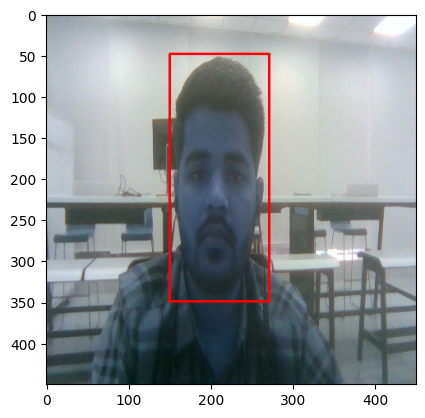

In [74]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

#This prints the augmented image with bounding box around it

So till now , we have applied one image augmentation on one image and labelled using albumentation.But we are intended to do it for train , test and val images.

In [75]:
import os

# Creating images and labels folder inside aug_data folder 
#to store the augmented train , test and val images .
base_dir = '/kaggle/working/facecustomeimagedataset/aug_data'

# Subfolders structure
subfolders = [
    'train/images',
    'train/labels',
    'test/images',
    'test/labels',
    'val/images',
    'val/labels',
]

# Create each folder
for folder in subfolders:
    path = os.path.join(base_dir, folder)
    os.makedirs(path, exist_ok=True)

print("Folder structure created successfully!")


Folder structure created successfully!


In [76]:
import os
import cv2
import json
import numpy as np
import albumentations as alb

# Albumentations augmentor
augmentor = alb.Compose([
    alb.RandomCrop(width=450, height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
], bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

# Loop through each partition
for partition in ['train', 'test', 'val']:
    base_path = f'/kaggle/working/facecustomeimagedataset/Data/{partition}'
    aug_path = f'/kaggle/working/facecustomeimagedataset/aug_data/{partition}'

    for image in os.listdir(os.path.join(base_path, 'images')):
        img_path = os.path.join(base_path, 'images', image)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Could not load image: {img_path}")
            continue

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(base_path, 'labels', f'{image.split(".")[0]}.json')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            h, w, _ = img.shape
            coords = list(np.divide(coords, [w, h, w, h]))

        try:
            for x in range(30):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                aug_img_path = os.path.join(aug_path, 'images', f'{image.split(".")[0]}.{x}.jpg')
                cv2.imwrite(aug_img_path, augmented['image'])

                annotation = {
                    'image': image,
                    'bbox': [0, 0, 0, 0],
                    'class': 0
                }

                if os.path.exists(label_path) and len(augmented['bboxes']) > 0:
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = 1

                aug_label_path = os.path.join(aug_path, 'labels', f'{image.split(".")[0]}.{x}.json')
                with open(aug_label_path, 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(f"Error processing {image}: {e}")
